In [623]:
## importing all the useful libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.metrics import accuracy_score, mean_squared_error


from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [624]:
#Reading the data
data = pd.read_csv('C:/Users/aashi/Desktop/house_sales/nyc-rolling-sales.csv')
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,7/19/17 0:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,12/14/16 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,12/9/16 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/16 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/16 0:00


In [625]:

# deleting data that is not useful for us
del data['Unnamed: 0']
del data['SALE DATE']
del data['EASE-MENT']
del data['ADDRESS']
del data['APARTMENT NUMBER']
del data['BLOCK']
del data['LOT']


In [626]:
# checking the variables and its datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 15 columns):
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GROSS SQUARE FEET                 84548 non-null object
YEAR BUILT                        84548 non-null int64
TAX CLASS AT TIME OF SALE         84548 non-null int64
BUILDING CLASS AT TIME OF SALE    84548 non-null object
SALE PRICE                        84548 non-null object
dtypes: int64(7), object(8)
memory usage: 9.7+ MB


In [627]:
#converting the datatypes to a compatable datatypes
#coverting the type of the categorical data:
data['BOROUGH'] = data['BOROUGH'].astype('category')
data['TAX CLASS AT PRESENT'] = data['TAX CLASS AT PRESENT'].astype('category')
data['TAX CLASS AT TIME OF SALE'] = data['TAX CLASS AT TIME OF SALE'].astype('category')
data['ZIP CODE'] = data['ZIP CODE'].astype('category')
data['YEAR BUILT'] = data['YEAR BUILT'].astype('category')

#converting the type to numeric
data['GROSS SQUARE FEET'] = pd.to_numeric(data['GROSS SQUARE FEET'], errors = 'coerce')
data['LAND SQUARE FEET'] = pd.to_numeric(data['LAND SQUARE FEET'], errors = 'coerce')
data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'], errors = 'coerce')

In [628]:
#Imputing the missing values with its mean for predictors
 
data['LAND SQUARE FEET']=data['LAND SQUARE FEET'].fillna(data['LAND SQUARE FEET'].mean())
data['GROSS SQUARE FEET']=data['GROSS SQUARE FEET'].fillna(data['GROSS SQUARE FEET'].mean())


In [629]:
#checking if the values are imputed 
data['GROSS SQUARE FEET'][0:20]

0      6440.000000
1     18690.000000
2      7803.000000
3      6794.000000
4      4615.000000
5      9730.000000
6      4226.000000
7     21007.000000
8      9198.000000
9     18523.000000
10    21328.000000
11    12350.000000
12     4045.707479
13     4045.707479
14     4045.707479
15     4045.707479
16     4045.707479
17     4045.707479
18     4045.707479
19     4045.707479
Name: GROSS SQUARE FEET, dtype: float64

In [630]:
# The Target SALE PRICE is zero for 20% of data. Removing them and also removing outliers to improve accuracy of the model

data = data[data['SALE PRICE'] != 0]
data = data[data['GROSS SQUARE FEET'] != 0]
data = data[data['LAND SQUARE FEET'] !=0]
data = data[data['TOTAL UNITS'] != 0]
data = data[data['YEAR BUILT']!= 0]
data = data[data['COMMERCIAL UNITS'] < 20]
data = data[np.isfinite(data['SALE PRICE'])]


In [631]:
# checking for the correlations in the data
corr_col=data.corr()
corr_col

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
RESIDENTIAL UNITS,1.000000,0.133180,0.998884,0.211242,0.644979,0.261157
COMMERCIAL UNITS,0.133180,1.000000,0.179128,0.145468,0.277941,0.226162
TOTAL UNITS,0.998884,0.179128,1.000000,0.216610,0.653464,0.270118
LAND SQUARE FEET,0.211242,0.145468,0.216610,1.000000,0.340806,0.075343
GROSS SQUARE FEET,0.644979,0.277941,0.653464,0.340806,1.000000,0.638454
SALE PRICE,0.261157,0.226162,0.270118,0.075343,0.638454,1.000000


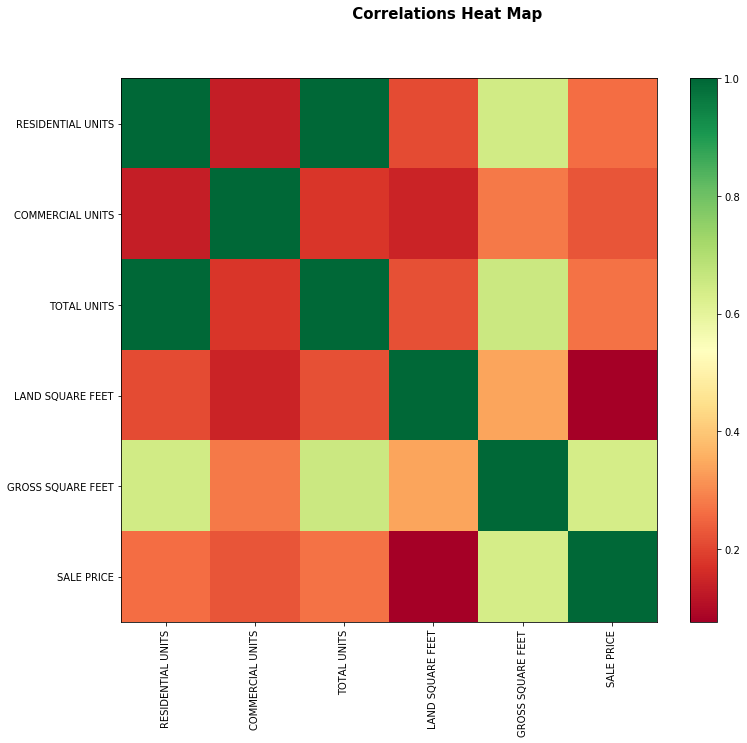

In [632]:
corr_col=data.corr()
corr_col=corr_col.fillna(0)
plt.figure(figsize=(12, 10))
plt.imshow(corr_col, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr_col)), corr_col.columns, rotation='vertical')
plt.yticks(range(len(corr_col)), corr_col.columns);
plt.suptitle(' Correlations Heat Map', fontsize=15, fontweight='bold')
plt.show()

#the correlation between GROSS SQUARE FEET AND SALE PRICE is high.

As we can see the correlation between GROSS SQUARE FEET and SALE PRICE is very high(0.64). This can be an important feature for sale price prediction.

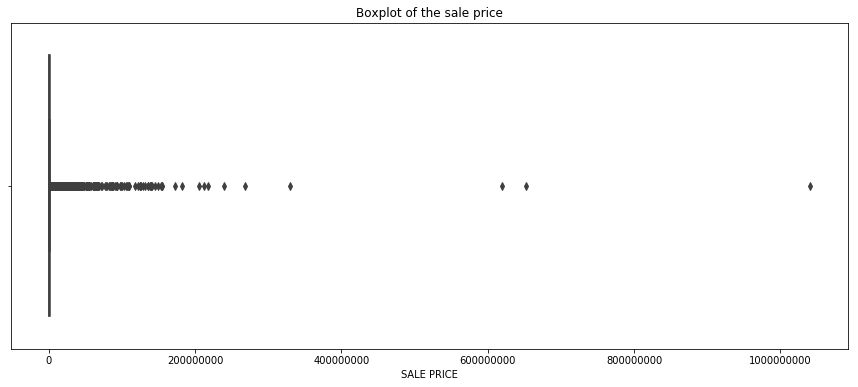

In [633]:
#finding and eliminating the outliers by plotting a boxplot. 

plt.figure(figsize=(15,6))

sns.boxplot(x='SALE PRICE', data=data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of the sale price')
plt.show()

As we can clearly see the outliers in the saleprice. for accuracy we remove the outliers from the data.

In [634]:
data = data[(data['SALE PRICE'] > 100000) & (data['SALE PRICE'] < 5000000)]
data = data[(data['GROSS SQUARE FEET'] < 12000) & (data['LAND SQUARE FEET'] < 10000)]

data.shape


(32806, 15)

In [635]:
#deleting the duplicate entries.
data.drop_duplicates(data.columns,inplace=True)

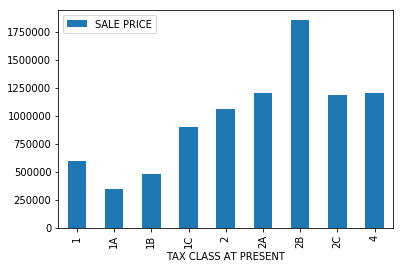

In [636]:
# Input data Analysis. 

median_tax = data.pivot_table(index = 'TAX CLASS AT PRESENT', values = 'SALE PRICE',aggfunc = np.median)

median_tax.plot(kind = 'bar')

It is clear that tax class 2 has greater selling price than of tax class 1. The tax class of 2B is greatest of all.
Considered the medians of all tax classes.

Clustering of the data is done for any possible insights.

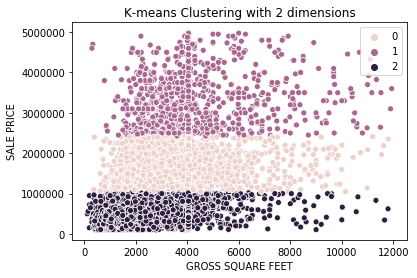

In [637]:
###clustering of the data using kmeans for any possible information.
kmeans = KMeans(n_clusters = 3)
y = kmeans.fit_predict(data[['GROSS SQUARE FEET','SALE PRICE']])

sns.scatterplot(x="GROSS SQUARE FEET", y="SALE PRICE", hue=y, data=data)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

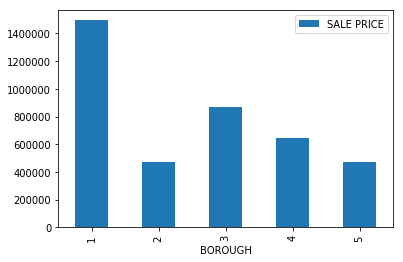

In [638]:
# checking the BOROUGH and SALE PRICE median relation
medianb = data.pivot_table(index = 'BOROUGH', values = 'SALE PRICE',aggfunc = np.median)
medianb
medianb.plot(kind = 'bar')

From the above plot, it is clear that the sale price is significantly higher for BOROUGH 1 which is MANHATTAN area. Hence BOROUGH can be a important feature for the sale price.

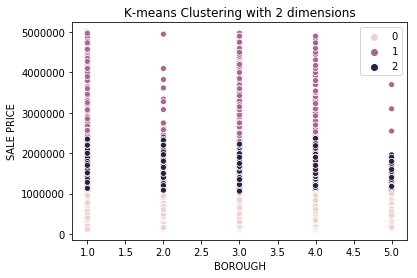

In [639]:

#clustering Borough and sale price
kmeans_b = KMeans(n_clusters = 3)
yb = kmeans_b.fit_predict(data[['GROSS SQUARE FEET','SALE PRICE']])

sns.scatterplot(x="BOROUGH", y="SALE PRICE", hue=yb, data=data)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

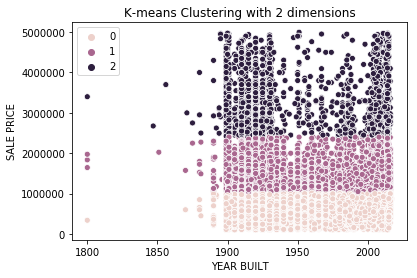

In [640]:
kmeans = KMeans(n_clusters = 3)
yy = kmeans.fit_predict(data[['YEAR BUILT','SALE PRICE']])

sns.scatterplot(x="YEAR BUILT", y="SALE PRICE", hue=yy, data=data)
plt.title('K-means Clustering with 2 dimensions')
plt.show()


The pattern here looks uniform or not interesting, we can notice that the expensive sale prices are concentrated in the area between 1900 and 1940 and then the plot becomes sparse. This can be an important factor for the sales price.

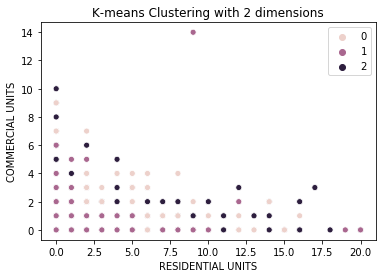

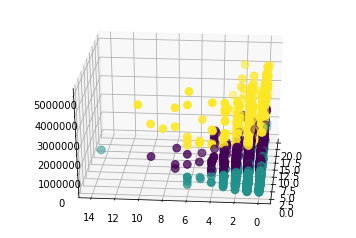

In [641]:
kmeans = KMeans(n_clusters = 3)
yt = kmeans.fit_predict(data[['RESIDENTIAL UNITS','COMMERCIAL UNITS','SALE PRICE']])

sns.scatterplot(x="RESIDENTIAL UNITS", y="COMMERCIAL UNITS", hue=yt, data=data)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['RESIDENTIAL UNITS'], data['COMMERCIAL UNITS'], data['SALE PRICE'], c=yt, s=60)
ax.view_init(30, 185)
plt.show()


The number of clusters in all the clusters is taken as 3. where 1 being cheaper and 3 being expensive and 2 is moderate.
The X axis is commercial units and Z axis is residential units.
It is clear from the above plots that as the number of units increase the sale price is also increasing.It seems that commercial units may have greater impact on the price.
We can check the impact by box plots.

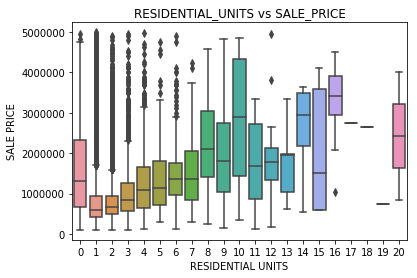

In [642]:
sns.boxplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=data)
plt.title('RESIDENTIAL_UNITS vs SALE_PRICE')
plt.show()

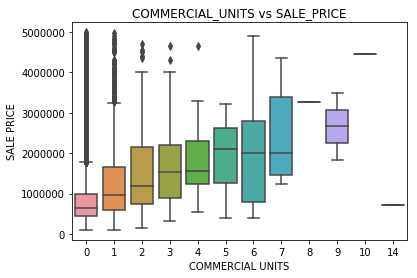

In [643]:
sns.boxplot(x='COMMERCIAL UNITS', y='SALE PRICE', data=data)
plt.title('COMMERCIAL_UNITS vs SALE_PRICE')
plt.show()

There is a clear increase in price as the commercial units increase. It also shows that number of commercial units have a greater impact on price than residential units.


In [644]:
# preprocessing the data for regression.

print(data.shape)
data['GROSS SQUARE FEET'].skew()


(32282, 15)


1.3082353230002401

In [645]:
#performing log transformation to treat the skewness
data['SALE PRICE'].skew()

data['SALE PRICE'] = np.log(data['SALE PRICE'])
data['GROSS SQUARE FEET'] = np.log(data['GROSS SQUARE FEET'])
data['LAND SQUARE FEET'] = np.log(data['LAND SQUARE FEET'])


Performing the linear regression with only one variable which is Gross square feet, as it is potentially the most important feature in determining the sale price


In [647]:
Y = data["SALE PRICE"]
X = data["GROSS SQUARE FEET"]


In [648]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [649]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25825,)
(25825,)
(6457,)
(6457,)


In [650]:
#converting to column vector
X_trainN = X_train[:, np.newaxis]
X_testN = X_test[:, np.newaxis]
y_trainN = y_train[:, np.newaxis]
y_testN = y_test[:, np.newaxis]

In [651]:
linreg = linear_model.LinearRegression()
linreg.fit(X_trainN, y_trainN)
pred = linreg.predict(X_testN)
print (np.shape(pred))
print (np.shape(y_testN))

(6457, 1)
(6457, 1)


C:\Users\aashi\ash\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


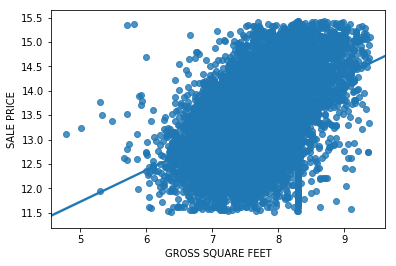

In [652]:
sns.regplot(x="GROSS SQUARE FEET", y="SALE PRICE", data = data)

In [653]:
print(np.shape(pred))
print(np.shape(y_test))
print(np.shape(y_testN))

(6457, 1)
(6457,)
(6457, 1)


In [654]:

mse = mean_squared_error(y_test, pred)
print("The root mean squared error is")
print(np.sqrt(mse))


The root mean squared error is
0.5858289176265412


<h1>Multi Regression:</h1>
<p>Looking for the variables relevant to Sale Price from the correlation matrix</p>

In [655]:
Yn = data["SALE PRICE"]
Xn = data[["GROSS SQUARE FEET", "TOTAL UNITS", "LAND SQUARE FEET"]]

In [656]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xn, Yn, test_size=0.20, random_state=42)

In [657]:
linreg1 = linear_model.LinearRegression()
linreg1.fit(X_train1, y_train1)
pred1 = linreg1.predict(X_test1)
print (np.shape(pred1))
print (np.shape(y_test1))
pred1 = linreg1.predict(X_test1)

(6457,)
(6457,)


In [658]:
mse1 = mean_squared_error(y_test1, pred1)
print("The root mean squared error is")
print(np.sqrt(mse1))

The root mean squared error is
0.5845067658731711
